In [1]:
using Pkg
using SSM
using Random
using Distributions
using LinearAlgebra
using Plots
using ForwardDiff

In [23]:
# create a PLDS model
Random.seed!(123)

x0 = [0.0, 0.0]
P0 = Matrix(Diagonal([1.0, 1.0]))

A = [cos(0.25) -sin(0.25); sin(0.25) cos(0.25)]
Q = Matrix(Diagonal([0.1, 0.1]))

C = [0.5 0.5; 0.5 0.1; 0.1 0.1]

d = [3., 3., 3.]
D = Matrix(Diagonal([0., 0., 0.]))


T = 150

x = zeros(T, 2)
λ = zeros(T, 3)
y = zeros(T, 3)
b = ones(T, 2) * 0.1

x[1, :] = x0 + sqrt.(diag(P0)) .* randn(2)
λ[1, :] = exp.(C*x[1, :] + d)
y[1, :] = rand.(Poisson.(λ[1, :]))

for t in 2:T
    s = y[t-1, :] # assuming window is 1
    x[t, :] = A*x[t-1, :] + b[t-1, :] + sqrt.(diag(Q)).*randn(2)
    λ[t, :] = exp.(C*x[t, :] + d + D*s)
    y[t, :] = rand.(Poisson.(λ[t, :]))
end



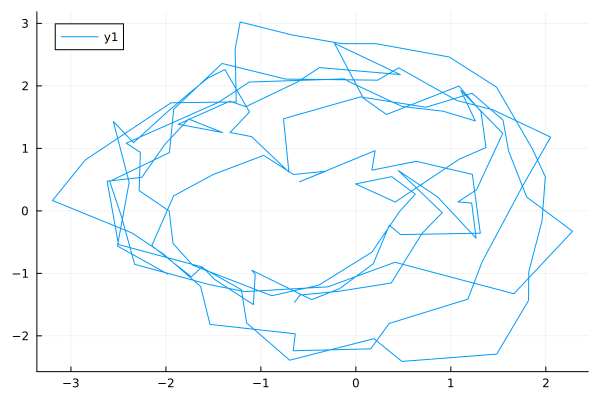

In [3]:
plot(x[:, 1], x[:, 2])

In [27]:
plds = SSM.PoissonLDS(;A=A, Q=Q, C=C, d=d, D=D, x0=x0, p0=P0, refractory_period=1, obs_dim=3, latent_dim=2, fit_bool=[true, true, true, true, true, true, true, true])

PoissonLDS([0.9689124217106447 -0.24740395925452294; 0.24740395925452294 0.9689124217106447], [0.5 0.5; 0.5 0.1; 0.1 0.1], [0.1 0.0; 0.0 0.1], [0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0], [3.0, 3.0, 3.0], Matrix{Float64}(undef, 0, 2), [0.0, 0.0], [1.0 0.0; 0.0 1.0], 1, 3, 2, Bool[1, 1, 1, 1, 1, 1, 1, 1])

In [43]:
SSM.logposterior(x, plds, y, ones(T, 2)*0.1)

26754.85835052211

In [44]:
SSM.loglikelihood(x, plds, y)

26754.85835052211

In [46]:
plds.b = reshape(b, T, 2, 1)
x_sm, p_sm = SSM.smooth(plds, reshape(y, T, 3, 1))


Norm of gradient iterate difference: 26.169543408560695
Norm of gradient iterate difference: 7.03633525782336
Norm of gradient iterate difference: 3.405353207250348
Norm of gradient iterate difference: 1.2619171319925064
Norm of gradient iterate difference: 0.16760500318140134
Norm of gradient iterate difference: 0.0030031431990576985
Norm of gradient iterate difference: 1.2397942615021586e-6
Converged at iteration 8


([-0.810621263182536 -0.78159241215458; -0.6485935061695368 -1.0712009943441643; … ; -1.7205273235261287 0.14162208874602095; -1.7611271813163116 -0.2405424849285;;;], [-0.11799001231428477 0.07112902643128584; -0.10222549617464433 0.06407417500248508; … ; -0.1534503111346433 0.09427034069966363; -0.18576593064551 0.10681395131363317;;; 0.06598538357183373 -0.17353337493173152; 0.05803689270112519 -0.13910727936362796; … ; 0.08880098998958182 -0.15889881647630913; 0.10681395131363314 -0.2106775141084122;;;;])

In [29]:
x_sm, p_sm = SSM.E_Step(plds, reshape(y, T, 3, 1))
SSM.M_Step!(plds, x_sm, reshape(y, T, 3, 1))

Norm of gradient iterate difference: 30.693247048631854
Norm of gradient iterate difference: 8.637265499889947
Norm of gradient iterate difference: 4.285452995912431
Norm of gradient iterate difference: 1.6776094402814223
Norm of gradient iterate difference: 0.3613126424273548
Norm of gradient iterate difference: 0.01794758679474625
Norm of gradient iterate difference: 4.5273583645689455e-5
Converged at iteration 8
Iter     Function value   Gradient norm 
     0    -2.671498e+04     6.392928e+01
 * time: 0.0009999275207519531
     1    -2.671665e+04     2.364597e+00
 * time: 0.010999917984008789
     2    -2.671665e+04     0.000000e+00
 * time: 0.01699995994567871
Iter     Function value   Gradient norm 
     0    -2.671665e+04     4.891208e+02
 * time: 0.0009999275207519531
     1    -2.681391e+04     0.000000e+00
 * time: 0.11800003051757812
Iter     Function value   Gradient norm 
     0    -2.681391e+04     1.297591e+02
 * time: 0.0
     1    -2.681577e+04     7.611678e+01
 * time:

2×2 Matrix{Float64}:
 1.0  0.0
 0.0  1.0

In [45]:
plds.Q = Matrix(Diagonal([0.1, 0.1]))

2×2 Matrix{Float64}:
 0.1  0.0
 0.0  0.1

In [9]:
size(p_sm)

(2, 2, 150)

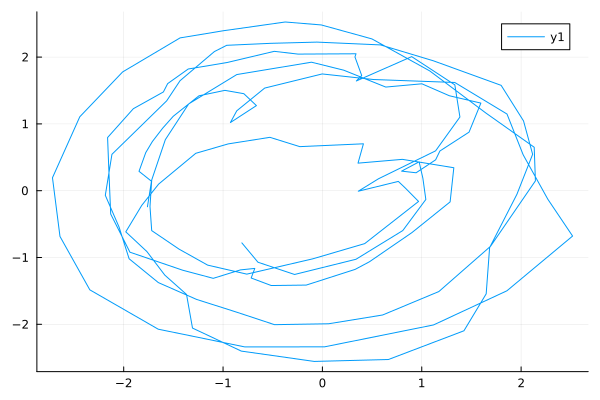

In [47]:
plot(x_sm[:, 1], x_sm[:, 2])
# plot!(x[:, 1], x[:, 2])

In [ ]:
x